## ALY6040

### Text Mining - Trump Tweet

Jessica Jiang

In [1]:
#install.packages("rvest")
install.packages("NLP")
install.packages("tm")
#install.packages("SnowballC")
install.packages ("RColorBrewer")

library("NLP")
library("tm") 
library（"utf8")
library("SnowballC") 
library("ggplot2")
library("RColorBrewer")
library("wordcloud")
library("cluster")


package 'NLP' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jessi\AppData\Local\Temp\RtmpohbLGC\downloaded_packages
package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jessi\AppData\Local\Temp\RtmpohbLGC\downloaded_packages
package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jessi\AppData\Local\Temp\RtmpohbLGC\downloaded_packages


Warning message:
"package 'NLP' was built under R version 3.6.3"Warning message:
"package 'tm' was built under R version 3.6.3"Warning message:
"package 'SnowballC' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate

Warning message:
"package 'wordcloud' was built under R version 3.6.3"

In [2]:
#Load data
name <- file.path("c:", "texts")
name
#Check loaded text
dir(name)

[1] "c:/texts"

[1] "Trump Black History Month Speech.txt"         
 [2] "Trump CIA Speech.txt"                         
 [3] "Trump Congressional Address.txt"              
 [4] "Trump CPAC Speech.txt"                        
 [5] "Trump Florida Rally 2-18-17.txt"              
 [6] "Trump Immigration Speech 8-31-16.txt"         
 [7] "Trump Inauguration Speech.txt"                
 [8] "Trump National Prayer Breakfast.txt"          
 [9] "Trump Nomination Speech.txt"                  
[10] "Trump Police Chiefs Speech.txt"               
[11] "Trump Response to Healthcare Bill Failure.txt"

### Data Exploration 

In [3]:
#Create Corpus after you create the Source
docs <- VCorpus(DirSource(name, encoding = "UTF-8"))   
summary(docs) 

                                              Length Class             Mode
Trump Black History Month Speech.txt          2      PlainTextDocument list
Trump CIA Speech.txt                          2      PlainTextDocument list
Trump Congressional Address.txt               2      PlainTextDocument list
Trump CPAC Speech.txt                         2      PlainTextDocument list
Trump Florida Rally 2-18-17.txt               2      PlainTextDocument list
Trump Immigration Speech 8-31-16.txt          2      PlainTextDocument list
Trump Inauguration Speech.txt                 2      PlainTextDocument list
Trump National Prayer Breakfast.txt           2      PlainTextDocument list
Trump Nomination Speech.txt                   2      PlainTextDocument list
Trump Police Chiefs Speech.txt                2      PlainTextDocument list
Trump Response to Healthcare Bill Failure.txt 2      PlainTextDocument list

In [4]:
#check details about documents
inspect(docs[1])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 3974



In [5]:
writeLines(as.character(docs[1]))

list(list(content = c("Well, the election, it came out really well. Next time we’ll triple the number or quadruple it. We want to get it over 51, right? At least 51.", "", "Well this is Black History Month, so this is our little breakfast, our little get-together. Hi Lynn, how are you? Just a few notes. During this month, we honor the tremendous history of African-Americans throughout our country. Throughout the world, if you really think about it, right? And their story is one of unimaginable sacrifice, hard work, and faith in America. I’ve gotten a real glimpse—during the campaign, I’d go around with Ben to a lot of different places I wasn’t so familiar with. They’re incredible people. And I want to thank Ben Carson, who’s gonna be heading up HUD. That’s a big job. That’s a job that’s not only housing, but it’s mind and spirit. Right, Ben? And you understand, nobody’s gonna be better than Ben.", 
"", "Last month, we celebrated the life of Reverend Martin Luther King, Jr., whose incre

In [6]:
#Remove numbers, capitalization, common words, punctuation
##Remove punctuation
docs <- tm_map(docs, removePunctuation)

for (j in seq(docs)) {
  docs[[j]] <- gsub("/", " ", docs[[j]])
  docs[[j]] <- gsub("@", " ", docs[[j]])
  docs[[j]] <- gsub("\\|—", " ", docs[[j]])
  docs[[j]] <- gsub("\u2028", " ", docs[[j]]) # This is an ascii character that did not translate, so it had to be removed.
}
##Remove numbers
docs <- tm_map(docs, removeNumbers)
##Convert to lowercase
docs <- tm_map(docs,tolower)
##Create plain text documents
docs <- tm_map(docs, PlainTextDocument)
docsCopy <- docs

In [7]:
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))   
# Text stemming
#docs <- tm_map(docs, stemDocument)
docs <- tm_map(docs, PlainTextDocument)
#Removing particular words
docs <- tm_map(docs, removeWords, c("syllogism", "tautology"))

In [8]:
#Combining words that should stay together.for example, combine "inner", "city" as "inner-city" so you can analyze them together
for (j in seq(docs))
{
  docs[[j]] <- gsub("fake news", "fake_news", docs[[j]])
  docs[[j]] <- gsub("inner city", "inner-city", docs[[j]])
  docs[[j]] <- gsub("politically correct", "politically_correct", docs[[j]])
}
docs <- tm_map(docs, PlainTextDocument)


In [9]:
#Stem words in a text document using Porter's stemming algorithm.
docs_st <- tm_map(docs, stemDocument)  
#docs_st <- tm_map(docs, lemmatize_strings)
docs_st <- tm_map(docs_st, PlainTextDocument)
writeLines(as.character(docs_st[1]))

list(list(content = c("well elect came realli well next time ’ll tripl number quadrupl want get right least", "", "well black histori month littl breakfast littl gettogeth hi lynn just note month honor tremend histori africanamerican throughout countri throughout world realli think right stori one unimagin sacrific hard work faith america ’ve gotten real glimpse— campaign ’d go around ben lot differ place wasn’t familiar ’re incred peopl want thank ben carson ’s gonna head hud ’s big job ’s job ’s hous ’s mind spirit right ben understand nobody’ gonna better ben", 
"", "last month celebr life reverend martin luther king jr whose incred exampl uniqu american histori read dr martin luther king week ago somebodi said took statu offic turn fake_new fake_new statu cherish ’s one favorit thing — good one lincoln jefferson dr martin luther king said statu bust martin luther king taken offic never even touch think disgrac ’s way press unfortun", "", "proud now museum nation mall peopl can lear

In [10]:
#docs_stc <- tm_map(docs_st, stemCompletion, dictionary = docsCopy, lazy=TRUE)
#docs_stc <- tm_map(docs_stc, PlainTextDocument)
#writeLines(as.character(docs_stc[1]))

In [11]:
docs <- tm_map(docs, stripWhitespace)
dtm <- DocumentTermMatrix(docs)   
dtm
print(dimnames(dtm)$Terms)

<<DocumentTermMatrix (documents: 11, terms: 3659)>>
Non-/sparse entries: 8364/31885
Sparsity           : 79%
Maximal term length: 19
Weighting          : term frequency (tf)

   [1] "—omarosa’s"          "‘mad"                "’ll"                
   [4] "’re"                 "’ve"                 "“’m"                
   [7] "“becomes"            "“can"                "“extremely"         
  [10] "“greater"            "“mad"                "“made"              
  [13] "“negligent”"         "“nothing"            "“ryan”"             
  [16] "“secretary"          "“suspension"         "“truth"             
  [19] "“whenever"           "abandon"             "abandoned"          
  [22] "abandonment"         "abc"                 "abe"                
  [25] "abilities"           "ability"             "able"               
  [28] "abolish"             "abolishing"          "abraham"            
  [31] "abroad"              "absolute"            "absolutely"         
  [34] "abuse"               "abused"              "academic"           
  [37] "academically"        "academics"           "academy"            
  [40] "accept"              "acceptable"          

### Explore Data

In [12]:
#Check words frequency
freq <- colSums(as.matrix(dtm))   
length(freq)   

[1] 3659

In [13]:
ord <- order(freq) 

In [14]:
freq <- sort(colSums(as.matrix(dtm)), decreasing=TRUE)   
freq

will              people               going             country 
                428                 278                 265                 174 
              great                want                 one                know 
                163                 140                 139                 127 
            america                 now            american               thank 
                122                 111                 107                 105 
              right                many                 can              theyre 
                102                 101                 100                  89 
               just               never                said                 get 
                 88                  83                  83                  79 
               like               think                time                back 
                 79                  77                  76                  75 
                way                 new                dont                much 
                 71                  69                  68                  68 
        immigration                 say              states                make 
                 67                  66                  65                  64 
               take              united                work                 ’re 
                 64                  64                  64                  61 
            believe                 law                good              really 
                 60                  59                  58                  57 
              world                come                even                also 
                 56                  55                  55                  54 
               jobs               years                must                look 
                 54                  54                  53                  52 
               well                tell           americans               every 
                 51                  50                  49                  49 
             nation                 see                year                 big 
                 48                  48                  47                  45 
               love              better               first                last 
                 45                  44                  44                  44 
                lot           president              system               thats 
                 44                  44                  44                  44 
        enforcement            citizens                ever             illegal 
                 43                  42                  42                  42 
             across                 let              things                 job 
                 41                  40                  40                  38 
             border                care            security                weve 
                 37                  37                  37                  37 
                day                 got              happen                long 
                 36                  36                  36                  36 
                win                 bad           countries                 put 
                 36                  35                  35                  35 
               safe               folks             protect                seen 
                 35                  34                  34                  34 
           together              number               today           everybody 
                 34                  33                  33                  32 
               made                need               trade             workers 
                 32                  32                  32                  32 
               plan             support      administration              aliens 
                 31                  31       

In [15]:
dtms <- removeSparseTerms(dtm, 0.2) # This makes a matrix that is 20% empty space, maximum.   
dtms

<<DocumentTermMatrix (documents: 11, terms: 87)>>
Non-/sparse entries: 848/109
Sparsity           : 11%
Maximal term length: 11
Weighting          : term frequency (tf)

In [16]:
freqs <- sort(colSums(as.matrix(dtms)), decreasing=TRUE)   
freqs

will      people       going     country       great        want 
        428         278         265         174         163         140 
        one        know     america         now    american       thank 
        139         127         122         111         107         105 
      right        many         can        just       never        said 
        102         101         100          88          83          83 
        get        like       think        time        back         way 
         79          79          77          76          75          71 
        new        much         say      states        take      united 
         69          68          66          65          64          64 
       work     believe         law        good      really       world 
         64          60          59          58          57          56 
       come        even        also       years        must        look 
         55          55          54          54          53          52 
       well        tell       every      nation         see        year 
         51          50          49          48          48          47 
        big        love        last         lot   president enforcement 
         45          45          44          44          44          43 
       ever         let      things         job        care         day 
         42          40          40          38          37          36 
     happen        long         bad         put        safe        seen 
         36          36          35          35          35          34 
   together       today        made        need  understand        life 
         34          33          32          32          29          27 
   remember     special        give   something      always        done 
         27          26          25          25          24          24 
     little      office     getting     another        came       group 
         24          24          23          22          20          20 
    totally   different       truly 
         18          16          16

In [17]:
#Words frequecy list
freqs <- sort(colSums(as.matrix(dtms)), decreasing=TRUE)   
head(freqs, 10) 

will  people   going country   great    want     one    know america     now 
    428     278     265     174     163     140     139     127     122     111

In [18]:
#Find the freqency term
wf <- data.frame(word=names(freqs), freq=freqs)   
head(wf) 

,word,freq
will,will,428
people,people,278
going,going,265
country,country,174
great,great,163
want,want,140


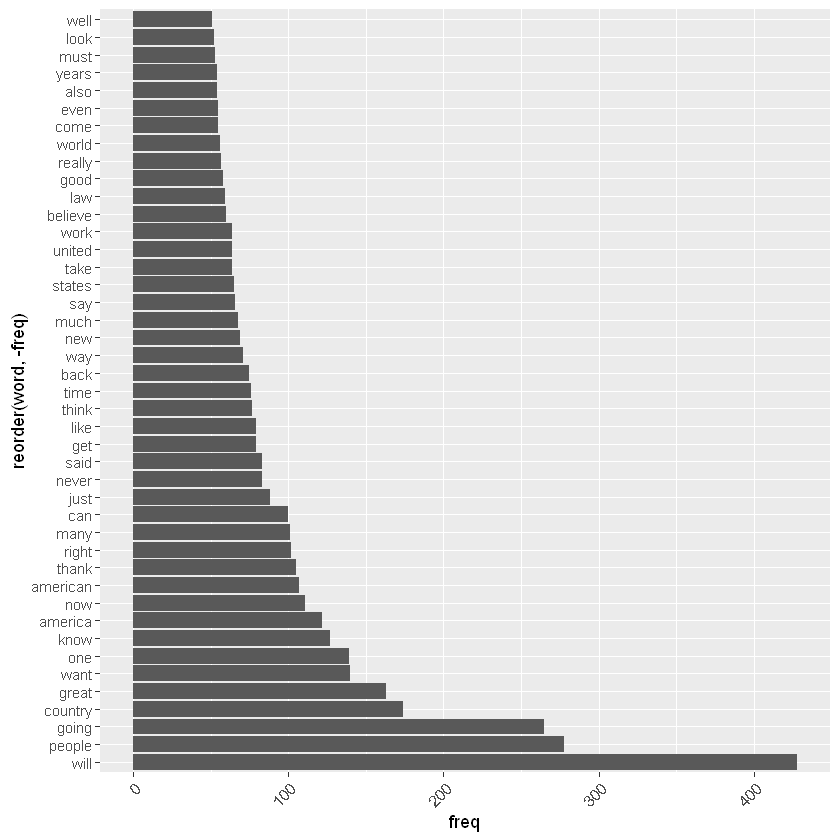

In [19]:
#plot the frequencey
p <- ggplot(subset(wf, freq>50), aes(x = reorder(word, -freq), y = freq)) +
          geom_bar(stat = "identity") + 
          theme(axis.text.x=element_text(angle=45, hjust=1))+
          coord_flip()
p   

### Wording Analysis

In [20]:
#Find term at least 100 times
findFreqTerms(dtms, 100)

[1] "america"  "american" "can"      "country"  "going"    "great"   
 [7] "know"     "many"     "now"      "one"      "people"   "right"   
[13] "thank"    "want"     "will"

In [21]:
#Correlation analysis
## country with American
findAssocs(dtm, c("country" , "american"), corlimit=0.9) # specifying a correlation limit of 0.9

$country
  nothing    cities countries      jobs      come   biggest    donors    second 
     0.95      0.94      0.94      0.92      0.91      0.90      0.90      0.90 

$american
restore    task    fair  budget 
   0.97    0.93    0.92    0.91

### WordCloud

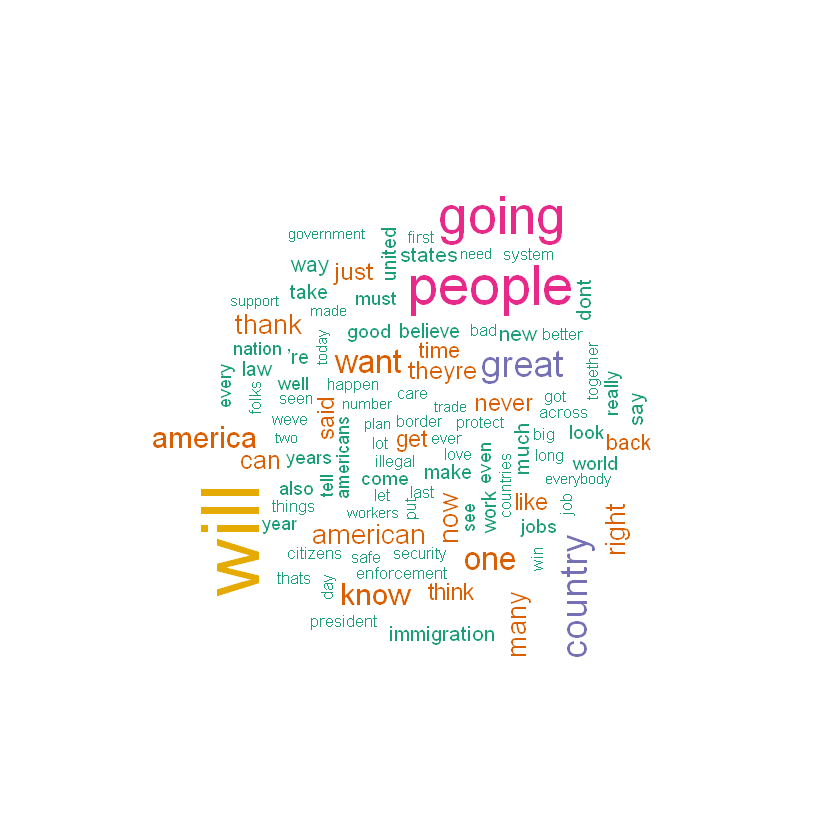

In [22]:
#plot the 100 most frequently occurring words
set.seed(142)
dark2 <- brewer.pal(6, "Dark2")   
wordcloud(names(freq), freq, max.words=100, rot.per=0.2, colors=dark2)   

### Clustering by Term - Hierarchal

In [23]:
#Romove uninteresting and infrequent wrods
dtmss <- removeSparseTerms(dtms, 0.15) # This makes a matrix that is only 15% empty space, maximum.   
dtmss
d <- dist(t(dtmss), method="euclidian")   
hc_d <- hclust(d=d, method="complete")   # for a different look try substituting: method="ward.D"
hc_d 

<<DocumentTermMatrix (documents: 11, terms: 43)>>
Non-/sparse entries: 452/21
Sparsity           : 4%
Maximal term length: 9
Weighting          : term frequency (tf)


Call:
hclust(d = d, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 43 


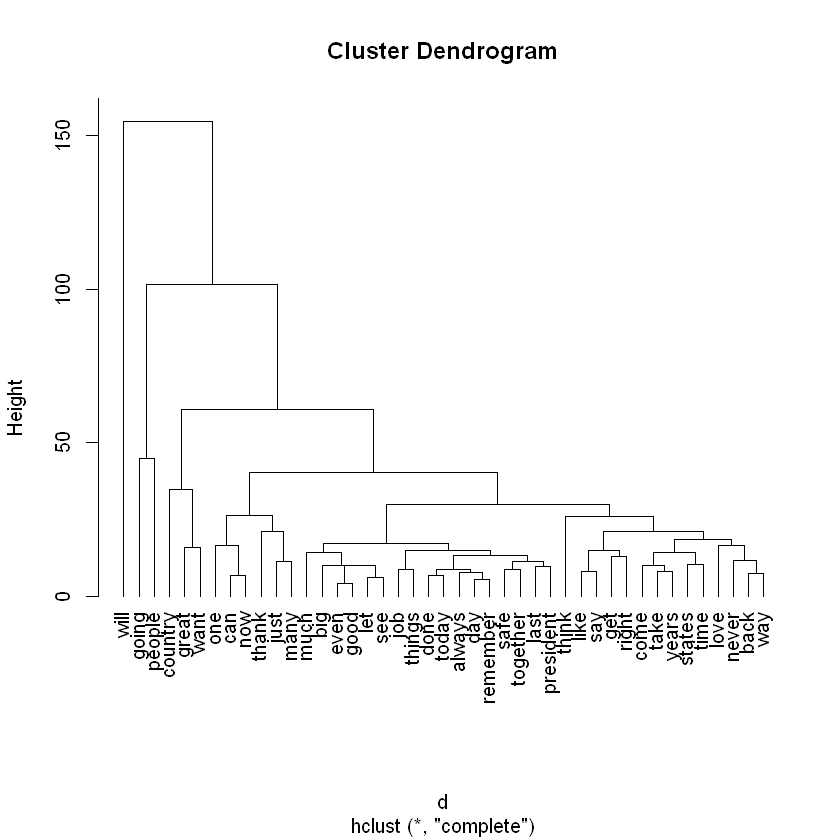

In [24]:
plot(hc_d , hang=-1)  

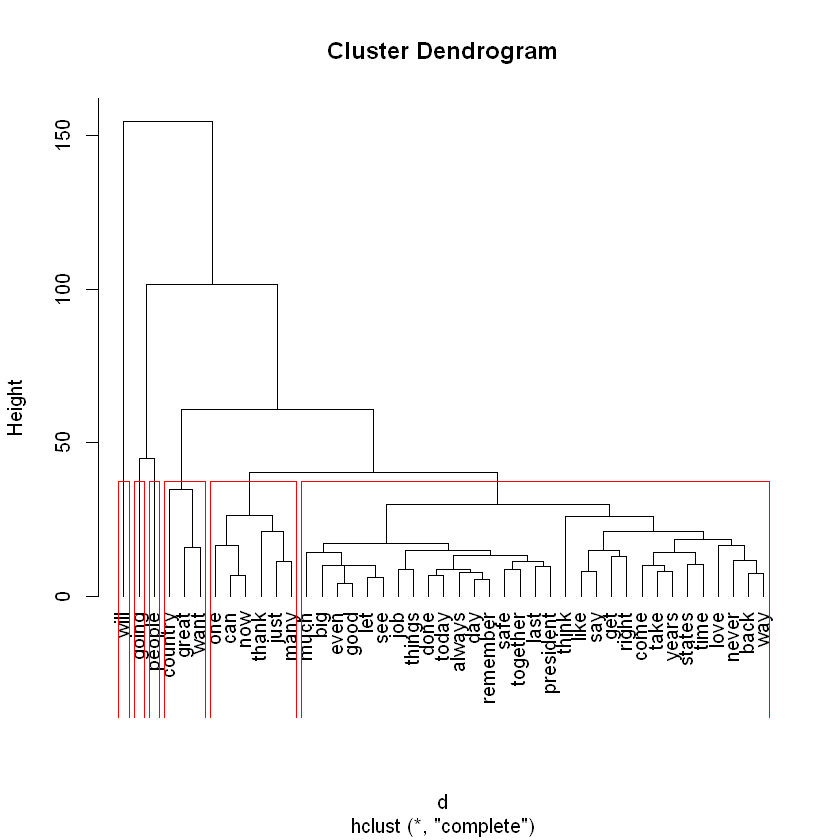

In [25]:
plot.new()
plot(hc_d , hang=-1) 
groups <- cutree(hc_d, k=6)   # "k=" defines the number of clusters you are using   
rect.hclust(hc_d, k=6, border="red") # draw dendogram with red borders around the 6 clusters  

### K-means Clustering

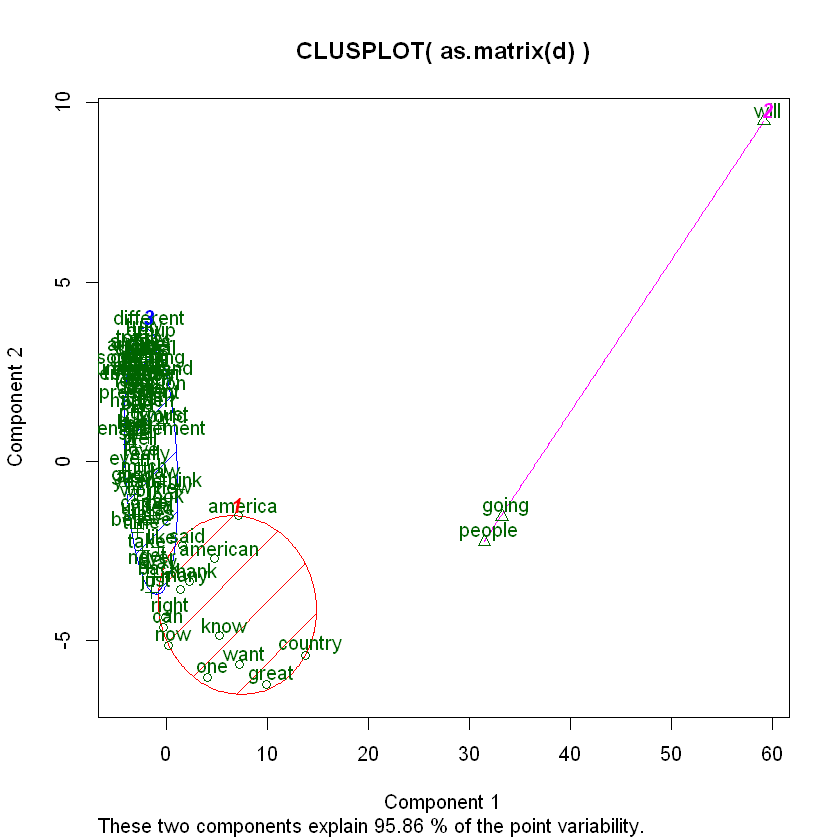

In [26]:
d <- dist(t(dtms), method="euclidian")
kfit <- kmeans(d, 3)   
clusplot(as.matrix(d), kfit$cluster, color=T, shade=T, labels=2, lines=0)  